In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string
import random

## Utils

In [2]:
def replace(value, bit):
    assert bit in [0, 1]
    return (value >> 1 << 1) | bit


def hide(image, target):
    assert image.shape == target.shape
    h, w = image.shape[:2]

    out = np.zeros_like(image, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            out[i, j] = replace(image[i, j], target[i, j])
    return out

## Hide flag

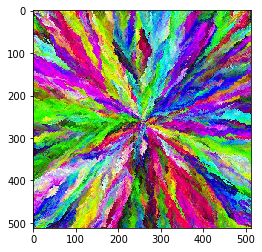

In [3]:
img = cv2.imread('data/base.jpg')  # image is BGR
orig = img.copy()
plt.imshow(img);

In [4]:
hidden_r = np.load('data/hidden_r.npy')
hidden_g = np.load('data/hidden_g.npy')
hidden_b = np.load('data/hidden_b.npy')

np.unique(hidden_r), hidden_r.shape

(array([0, 1], dtype=uint8), (512, 512))

CPU times: user 2.86 s, sys: 55.4 ms, total: 2.92 s
Wall time: 2.83 s


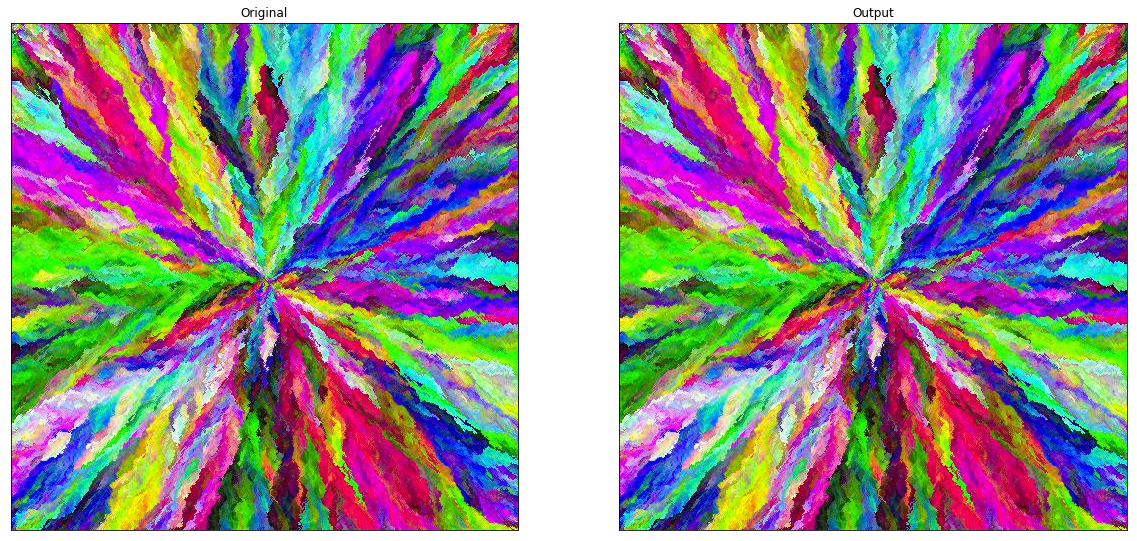

In [5]:
%%time
img[:, :, 2] = hide(img[:, :, 2], hidden_r)
img[:, :, 1] = hide(img[:, :, 1], hidden_g)
img[:, :, 0] = hide(img[:, :, 0], hidden_b)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.imshow(orig)
plt.subplot(1, 2, 2)
plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.imshow(img);

## Set values

In [6]:
coords = np.load('data/coords.npy')
coords.shape

(37, 2)

In [7]:
random.seed(1024)

s = string.ascii_letters + string.digits
flag = ''.join(random.choices(s, k=32))
flag = 'CTF{%s}' % flag
flag

'CTF{XDyZ1gF7SSy8S2XgjDT0v8LcfVfwu2ws}'

In [8]:
vals = [ord(c) for c in flag]
str(vals)

'[67, 84, 70, 123, 88, 68, 121, 90, 49, 103, 70, 55, 83, 83, 121, 56, 83, 50, 88, 103, 106, 68, 84, 48, 118, 56, 76, 99, 102, 86, 102, 119, 117, 50, 119, 115, 125]'

In [9]:
# set green channel
for i in range(12):
    x, y = coords[i]
    img[y, x, 1] = vals[i]
    
# set red channel
for i in range(12, 24):
    x, y = coords[i]
    img[y, x, 2] = vals[i]
    
# set blue channel
for i in range(24, len(vals)):
    x, y = coords[i]
    img[y, x, 0] = vals[i]

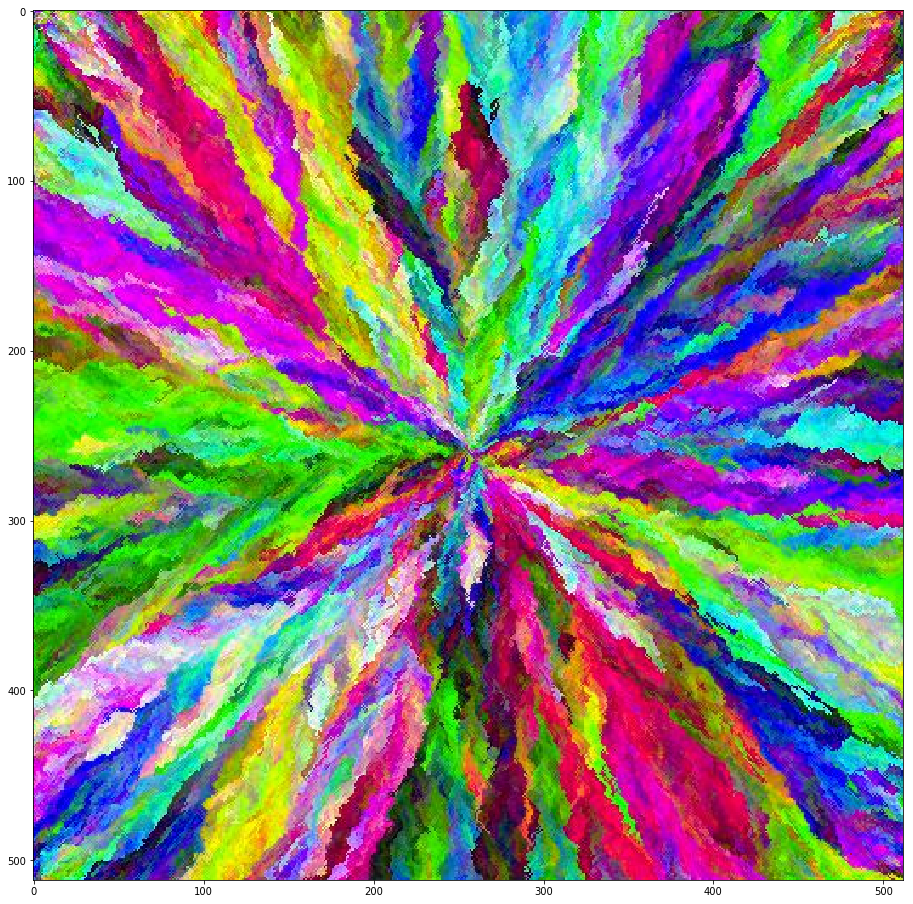

In [10]:
plt.figure(figsize=(16, 16))
plt.imshow(img);

In [11]:
cv2.imwrite('out.png', img)

True